<a href="https://colab.research.google.com/github/vrishi220/MachineLearning/blob/master/MLhw1prob5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.4189 - acc: 0.8522 - val_loss: 0.2629 - val_acc: 0.9126
Epoch 2/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.2227 - acc: 0.9259 - val_loss: 0.1762 - val_acc: 0.9427
Epoch 3/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.1657 - acc: 0.9467 - val_loss: 0.1450 - val_acc: 0.9528
Epoch 4/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.1368 - acc: 0.9560 - val_loss: 0.1311 - val_acc: 0.9575
Epoch 5/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.1194 - acc: 0.9623 - val_loss: 0.1128 - val_acc: 0.9638
Epoch 6/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.1074 - acc: 0.9663 - val_loss: 0.1061 - val_acc: 0.9648
Epoch 7/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.0984 - acc: 0.9684 - val_loss: 0.0984 - val_acc

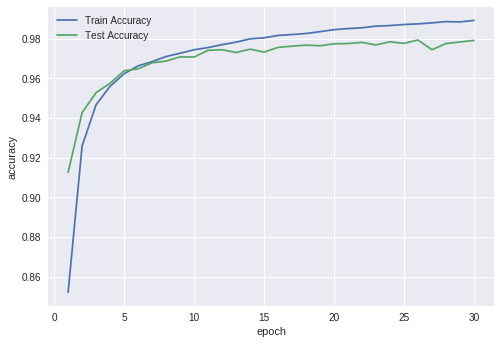

In [8]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt

rate, batch_size, classes_size, epochs, input_size, final  = 0.05, 100, 10, 50, 28**2, []

batch_size = 128
num_classes = 10
epochs = 30

# Reshape the training and testing data of a single dimension by 28*28. 
# Then the values of the reshaped vector are taken as float32 values for the ease of readability.
# Then the values are divided by 255 (max count for colors) so as to make all values withiin 0 to 1.
def reshapeAndReduce(X): return X.reshape(X.shape[0],X.shape[1]*X.shape[2]).astype('float32')/255

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

for each in (y_train, y_test):
  for i in range(each.shape[0]):
    if each[i] == 8: each[i] = 3
    elif each[i] in [0,6,9]: each[i] = 2
    else: each[i] = 1

x_train, x_test = reshapeAndReduce(x_train), reshapeAndReduce(x_test)

# convert class vectors to binary class matrices
y_train,y_test = to_categorical(y_train, num_classes), to_categorical(y_test, num_classes)

# Initialize a sequential model
model = Sequential()

#Add two dense layers, one with 100 neurons and another with 10 for output. 
#The first utilizes the relu activstion function and the other utilizes softmax activation function
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

# Compile loss with Categorical Cross Entropy and utiize the Stochastic Gradient Descent with a learning rate of 0.05. 
# We pull metrics for Accuracy 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.SGD(lr=rate),metrics=['accuracy'])


hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(hist.history)

plotaccuracy = plt.plot(range(1,31),hist.history['acc'],range(1,31),hist.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)